<a href="https://colab.research.google.com/github/Sreeja3207/AI-Driven-OSINT/blob/main/Threat_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

In [ ]:
df=pd.read_csv("cyberbullying_tweets.csv")


print(df.head())

                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [ ]:
#Analyzing the shape of the dataset
print(df.shape)
#There are 4080 rows and 4 columns

#Printing the information of the dataset
print(df.info)

# Check for null values in the entire DataFrame
null_values=df.isnull().sum()
print("Null values: " ,null_values)

(47692, 2)
<bound method DataFrame.info of                                               tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]>
Null values:  twee

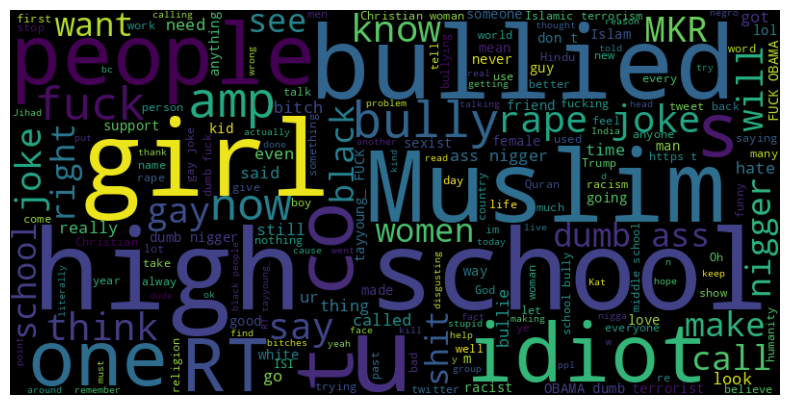

In [ ]:
text = ' '.join(df['tweet_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
#Bilinear interpolation is a method of smoothing an image when it is displayed at a resolution different from its original size.
plt.axis('off')  # Turn off axis
plt.show()



In [ ]:
# Function to extract polarity from TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each tweet
df['polarity'] = df['tweet_text'].apply(get_polarity)

# Generate sentiment labels based on polarity
df['sentiment_label'] = df['polarity'].apply(lambda x: 'positive' if x > 0.8 else ('negative' if x < 0 else 'neutral'))
#The value 0.8 is a threshold that helps to distinguish between positive and neutral sentiment.

# Print the DataFrame to verify
print(df)

# Separate text based on sentiment labels for positive, negative, and neutral
positive_text = ' '.join(df.loc[df['sentiment_label'] == 'positive', 'tweet_text'])
negative_text = ' '.join(df.loc[df['sentiment_label'] == 'negative', 'tweet_text'])
neutral_text = ' '.join(df.loc[df['sentiment_label'] == 'neutral', 'tweet_text'])

# Generate word clouds for each sentiment label
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
neutral_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

# Display the word clouds for each sentiment label
plt.figure(figsize=(18, 6))

                                              tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

       polarity sentiment_label  
0     -0.156250  

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

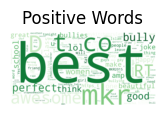

In [ ]:
# Positive word cloud
plt.subplot(1, 3, 1)
plt.title("Positive Words")
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

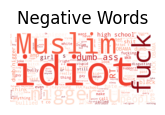

In [ ]:
# Negative word cloud
plt.subplot(1, 3, 2)
plt.title("Negative Words")
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

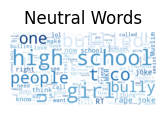

In [ ]:
# Neutral word cloud
plt.subplot(1, 3, 3)
plt.title("Neutral Words")
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Make sure 'label' column is categorical (binary or multi-class classification)
df['sentiment_label'] = df['sentiment_label'].astype('category')

X = df['tweet_text']  # Text data
y = df['sentiment_label']     # Labels (Bullying or Not), target variable, column that you want to predict

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and Naive Bayes
# Pipeline ensures vectorization and model training are combined in one step
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Train the Naive Bayes model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7996645350665689
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.57      0.70      3806
     neutral       0.77      0.96      0.85      5690
    positive       0.00      0.00      0.00        43

    accuracy                           0.80      9539
   macro avg       0.56      0.51      0.52      9539
weighted avg       0.82      0.80      0.79      9539



Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

    bullying       0.67      0.67      0.67         3
non-bullying       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



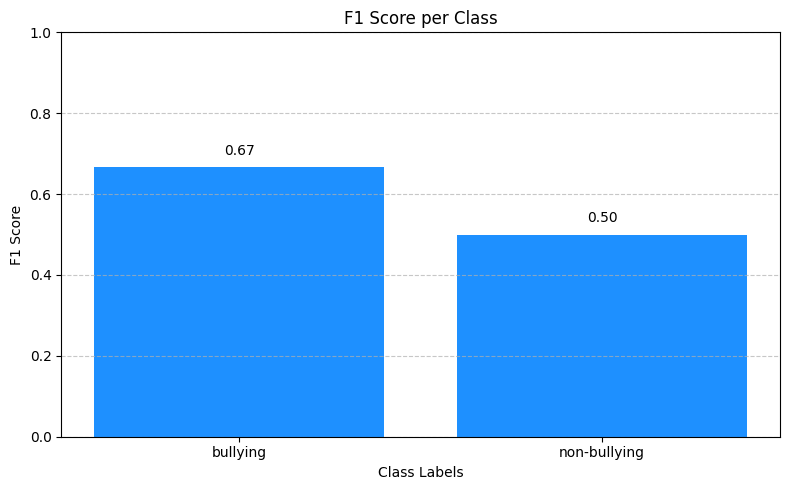

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Assuming you already have y_test and y_pred
# Example values (Replace with your real labels)
y_test = ['bullying', 'non-bullying', 'bullying', 'bullying', 'non-bullying']
y_pred = ['bullying', 'non-bullying', 'non-bullying', 'bullying', 'bullying']

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Extract F1 scores per class
labels = list(set(y_test))  # Unique class labels
_, _, f1_scores, _ = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)

# Plot F1 Score per class
plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color='dodgerblue')
plt.title("F1 Score per Class")
plt.xlabel("Class Labels")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.03, f"{score:.2f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


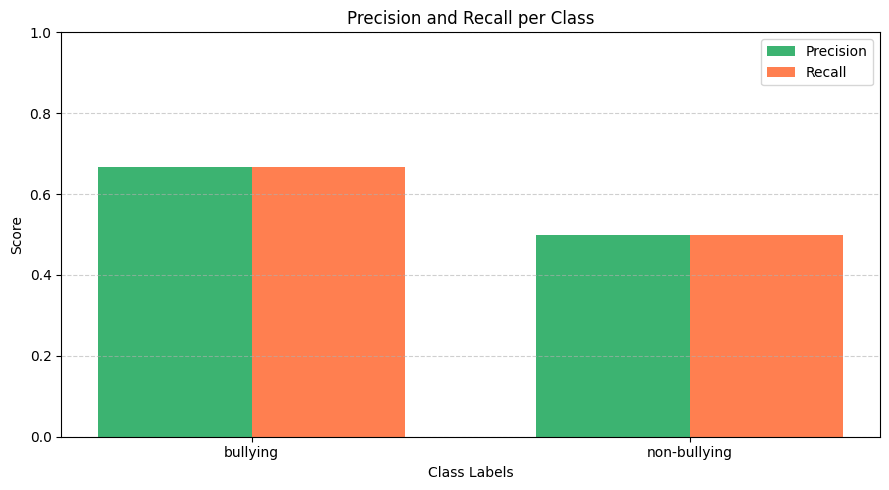

In [ ]:
# Extract metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)

# Plot precision and recall
x = range(len(labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x, precision, width=width, label='Precision', color='mediumseagreen')
plt.bar([p + width for p in x], recall, width=width, label='Recall', color='coral')

plt.xlabel('Class Labels')
plt.ylabel('Score')
plt.title('Precision and Recall per Class')
plt.xticks([p + width / 2 for p in x], labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


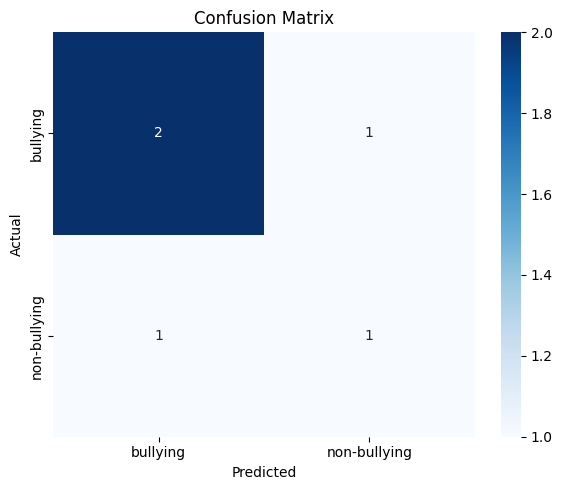

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


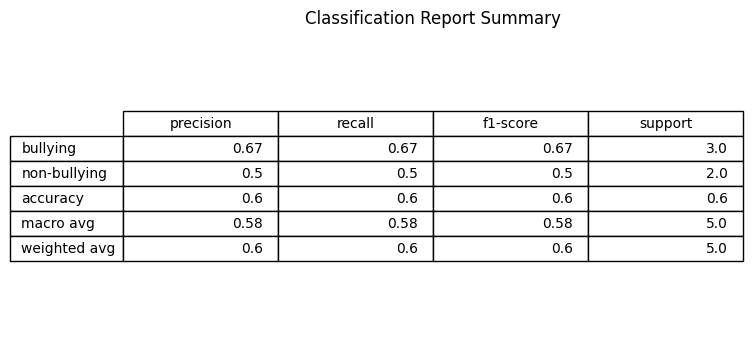

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
df = pd.DataFrame(report).transpose()

# Plot as table
plt.figure(figsize=(8, 4))
plt.axis('off')
tbl = plt.table(cellText=df.round(2).values, colLabels=df.columns, rowLabels=df.index, loc='center')
tbl.scale(1, 1.5)
plt.title("Classification Report Summary")
plt.show()
